**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import math

2025-07-27 11:34:38.454656: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-27 11:34:38.454827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-27 11:34:38.620320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Obtaining Dataset**

In [2]:
def get_stock_data():
    url = "/kaggle/input/apple-stocks-prediction-dataset/AAPL.csv"
    stocks = pd.read_csv(url)
    df = pd.DataFrame(stocks)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['Volume'] = df['Volume'] / 10000
    return df

**Loading and preprocessing the data**

In [3]:
df = get_stock_data()
df = df[['Open', 'High', 'Close', 'Volume']]

/tmp/ipykernel_34/226461588.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


**Normalization**

In [4]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

**Preparation**

In [5]:
factor = 0.80
length = len(scaled_df)
total_for_train = int(length * factor)
train_data = scaled_df[:total_for_train]
test_data = scaled_df[total_for_train:]

X_train = train_data[['High', 'Open', 'Volume']]
Y_train = train_data[['Close']]
X_test = test_data[['High', 'Open', 'Volume']]
Y_test = test_data[['Close']]

**Building and training the ANN**

In [6]:
classifier = Sequential()
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=3))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
classifier.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0458
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0301
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0150
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0808e-04 - val_loss: 0.0013
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4577e-04 - val_loss: 7.2548e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9751e-04 - val_loss: 7.4777e-04
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2015e-04 - val_loss: 3.0808e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9122e-04 - val_loss: 3.1395e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5085e-04 - val_loss: 1.4378e-04
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0651e-04 - val_loss: 1.3683e-04
Epoch 12/50
31/31 ━━━━

**Predicting and Evaluating Performance using Evaluation Scores like MSE and RMSE**

In [7]:
predictions = classifier.predict(X_test)
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.6f MSE (%.6f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.6f MSE (%.6f RMSE)' % (testScore, math.sqrt(testScore)))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Score: 0.000028 MSE (0.005280 RMSE)
Test Score: 0.000106 MSE (0.010278 RMSE)


**Visualization Plot**

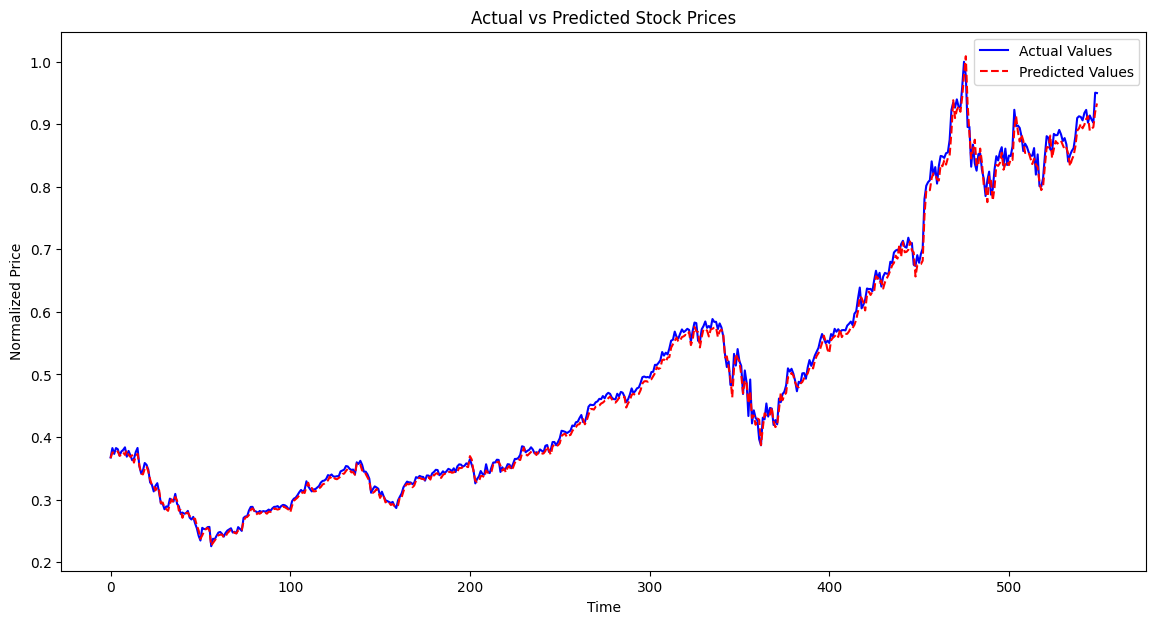

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(Y_test.values, color='blue', label='Actual Values')
plt.plot(predictions, color='red', linestyle='--', label='Predicted Values')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


**Tabular Display of First 30 Actual vs Predicted Values**

In [9]:
comparison_df = pd.DataFrame({
    'Actual': Y_test.values.flatten(),
    'Predicted': predictions.flatten()
})

print(comparison_df.head(30))

      Actual  Predicted
0   0.367210   0.366111
1   0.382251   0.375203
2   0.372924   0.375031
3   0.382329   0.374151
4   0.380444   0.377052
5   0.370293   0.369853
6   0.376753   0.371543
7   0.379384   0.375325
8   0.383468   0.371346
9   0.368467   0.378558
10  0.377715   0.371402
11  0.370843   0.368194
12  0.362871   0.370773
13  0.364952   0.359007
14  0.375869   0.369538
15  0.382467   0.373059
16  0.353524   0.354920
17  0.341959   0.341322
18  0.346239   0.340120
19  0.358374   0.349166
20  0.355507   0.353104
21  0.347614   0.344723
22  0.327389   0.332180
23  0.323580   0.322769
24  0.312918   0.321909
25  0.321970   0.314581
26  0.326133   0.319716
27  0.311072   0.314899
28  0.293636   0.294406
29  0.293243   0.295197


**Optionally, saving the table to a CSV file**

In [10]:
comparison_df.to_csv('predicted_vs_actual.csv', index=False)